# Movimiento Browniano
## Simulando el IPC


Autor: Guillermo Izquierdo  
Este código es para fines educativos exclusivamente  

Un proceso aleatorio que describe el comportamiento de ciertas variables aleatorias a medida que se desplazan en el tiempo. Este proceso se utiliza frecuentemente en los modelos financieros para describir la evolución de los precios a lo largo del tiempo. Cuando se aplica a los precios, el movimiento browniano da por supuesto que el cambio de un período de tiempo al siguiente no está relacionado ni con el nivel de precios ni con las series pasadas de cambios de precio. Es decir, cada cambio de precio es independiente de los cambios de precio anteriores y la volatilidad de los cambios de precio es constante.  

$$ \delta S_t  = \mu S_t \delta t + \sigma S_t \delta B_t $$  

$$ S_{t+1} = S_t exp (( \mu - \frac{1}{2} \sigma^2) \delta t + \sigma \delta B_t)  $$

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date

In [2]:
enddate = date.datetime(2019,11,1)
startdate = date.datetime(2000,1,1)

ipc = pdr.get_data_yahoo('^MXX', start = startdate, end = enddate)['Close']

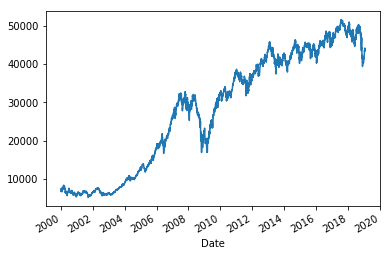

In [4]:
ipc.plot()

In [11]:
last_year = np.log(ipc[-252:])
sigma = last_year.pct_change().std()*(252**0.5)
sigma

0.015589256959473306

In [10]:
mu = (last_year[-1:].values / last_year[:1].values) - 1
mu

array([-0.01411254])

In [7]:
window = 100
T = 1.0
last_price = ipc[-1:]

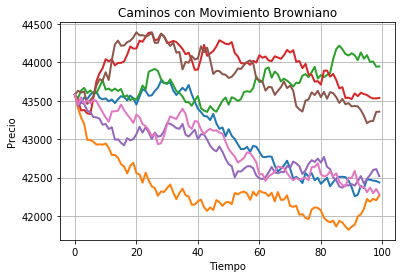

In [9]:
import scipy as sp 
import matplotlib.pyplot as plt
%matplotlib inline

sp.random.seed(100)
paths = 7
dt =T/window
S = sp.zeros([window], dtype=float)
x = range(0, int(window), 1)

df = pd.DataFrame()
# Figure setup
fig=plt.figure()
axis=fig.add_subplot(111)
for j in range(0, paths):
    S[0]= last_price
    for i in x[:-1]:
        e=sp.random.normal()
        S[i+1]=S[i]+S[i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[i]*sp.sqrt(dt)*e
    df[j] = S    
    plt.plot(x, S,lw=2)
    
plt.title('Caminos con Movimiento Browniano')
axis.set_xlabel('Tiempo')
axis.set_ylabel('Precio')
axis.grid(True)
plt.show()

In [12]:
df2 = pd.concat([ipc,df], axis = 0)
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis = 1)
df2.head()

,0,1,2,3,4,5,6
0,7077.709961,NaN,NaN,NaN,NaN,NaN,NaN
1,6675.270020,NaN,NaN,NaN,NaN,NaN,NaN
2,6764.310059,NaN,NaN,NaN,NaN,NaN,NaN
3,6751.649902,NaN,NaN,NaN,NaN,NaN,NaN
4,7047.089844,NaN,NaN,NaN,NaN,NaN,NaN


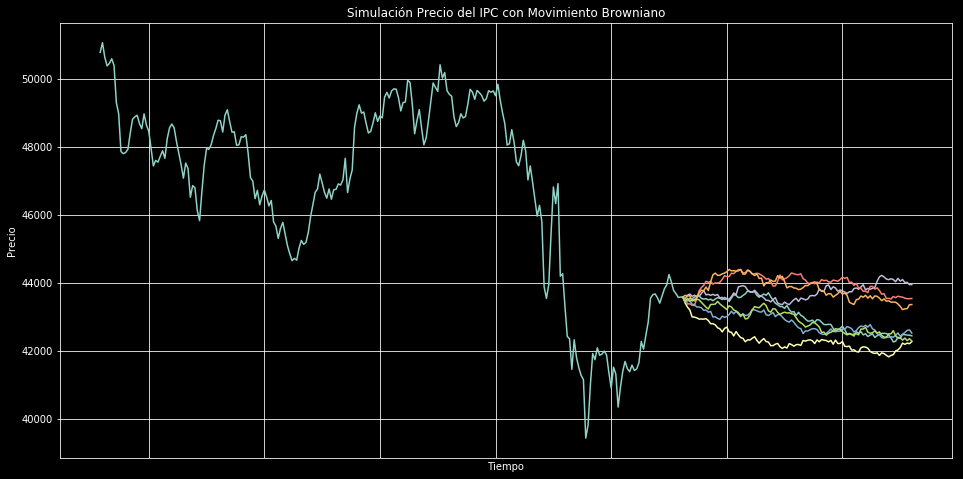

In [13]:
plt.style.use('dark_background')
df3 = df2[-352:]
fig2 = plt.figure(figsize = (16,8))
axis2 = fig2.add_subplot(111)
plt.plot(df3)
plt.title('Simulación Precio del IPC con Movimiento Browniano')
axis2.set_xlabel('Tiempo')
axis2.set_ylabel('Precio')
axis2.grid(True)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 
plt.show()